<a href="https://colab.research.google.com/github/JosueBVN/Implementacion-JBVN-A01751694/blob/main/A01751694_PDM_Implem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Introducción:***
En la exploración de la serie temporal que representa el número mensual de pasajeros de aerolíneas, se han seguido una serie de pasos meticulosos con el objetivo de comprender la naturaleza subyacente de los datos. Se ha iniciado el proceso con la instalación de bibliotecas esenciales para análisis de series temporales, estableciendo así un entorno adecuado para la manipulación y visualización de datos.

La elección del conjunto de datos, disponible en el repositorio de Jason Brownlee, se basa en su relevancia y accesibilidad. El número mensual de pasajeros de aerolíneas proporciona un escenario típico de series temporales que presenta posibles patrones estacionales y tendencias a lo largo del tiempo.

**Razón de la Elección del Modelo:**

La aplicación de la Prueba de Dickey-Fuller Aumentada (ADF) en la serie temporal original reveló una falta de estacionariedad, indicando la necesidad de técnicas que aborden esta característica. Se optó por la diferenciación como método para lograr la estacionariedad, ya que esta técnica suele ser efectiva en la eliminación de tendencias y patrones temporales no deseados.

**Razón de la Elección del Proceso de Diferenciación:**

La elección de aplicar la diferenciación se fundamenta en la observación de la serie temporal original y la necesidad de transformarla en una forma más estacionaria. El objetivo es facilitar el análisis de patrones y facilitar la aplicación de modelos de series temporales.

A continuación, se presenta un resumen detallado de cada paso, incluida la visualización de la serie temporal original y diferenciada, así como la realización de pruebas de estacionariedad para validar la efectividad del proceso de diferenciación. Este enfoque integral busca proporcionar una base sólida para futuros análisis y modelado de la serie temporal.

#1. Carga de bibliotecas y datos:
 Antes de ejecutar el código principal, es necesario instalar las bibliotecas que se utilizarán en el entorno o ambiente de desarrollo. Esto se realiza fuera del código principal y generalmente se hace en la terminal o en un entorno virtual.

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

#2. Carga y Visualización de Datos:

 Se carga el conjunto de datos de pasajeros de aerolíneas mensuales y se visualiza la serie temporal original mediante un gráfico.

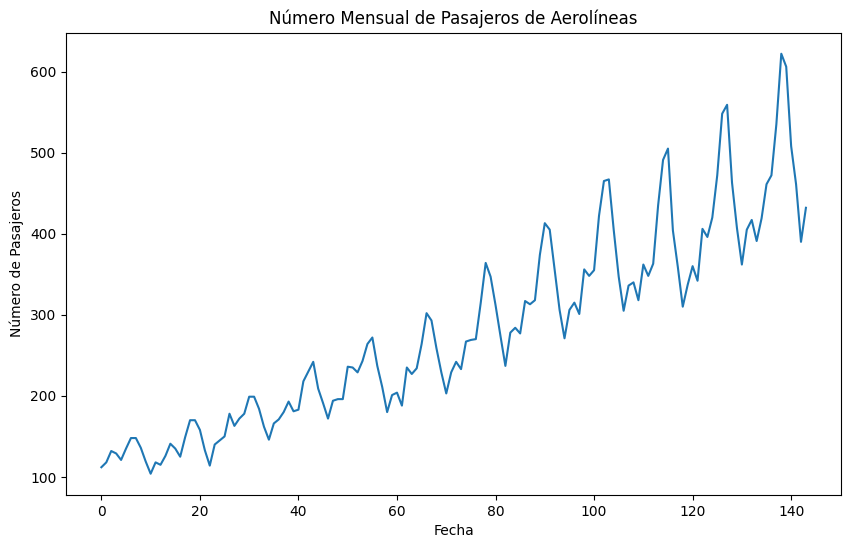

In [2]:
# Cargar el conjunto de datos
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)
df.head()

# Visualización de la serie temporal original
plt.figure(figsize=(10, 6))
plt.plot(df['Passengers'])
plt.title('Número Mensual de Pasajeros de Aerolíneas')
plt.xlabel('Fecha')
plt.ylabel('Número de Pasajeros')
plt.show()



#3. Prueba de Estacionariedad en la Serie Temporal Original:

Se realiza la prueba de estacionariedad en la serie temporal original utilizando la Prueba de Dickey-Fuller Aumentada (ADF). Esta prueba evalúa si la serie es estacionaria o no.
*texto en cursiva*

In [3]:
# Prueba de estacionariedad en la serie temporal original
result = adfuller(df['Passengers'])
print('Estadística de la prueba ADF:', result[0])
print('Valor p:', result[1])


Estadística de la prueba ADF: 0.8153688792060498
Valor p: 0.991880243437641


#4. Análisis de Autocorrelación y Autocorrelación Parcial

Se generan y visualizan las funciones de autocorrelación y autocorrelación parcial para ayudar en la identificación de patrones y posibles componentes estacionales o tendencias en la serie temporal.

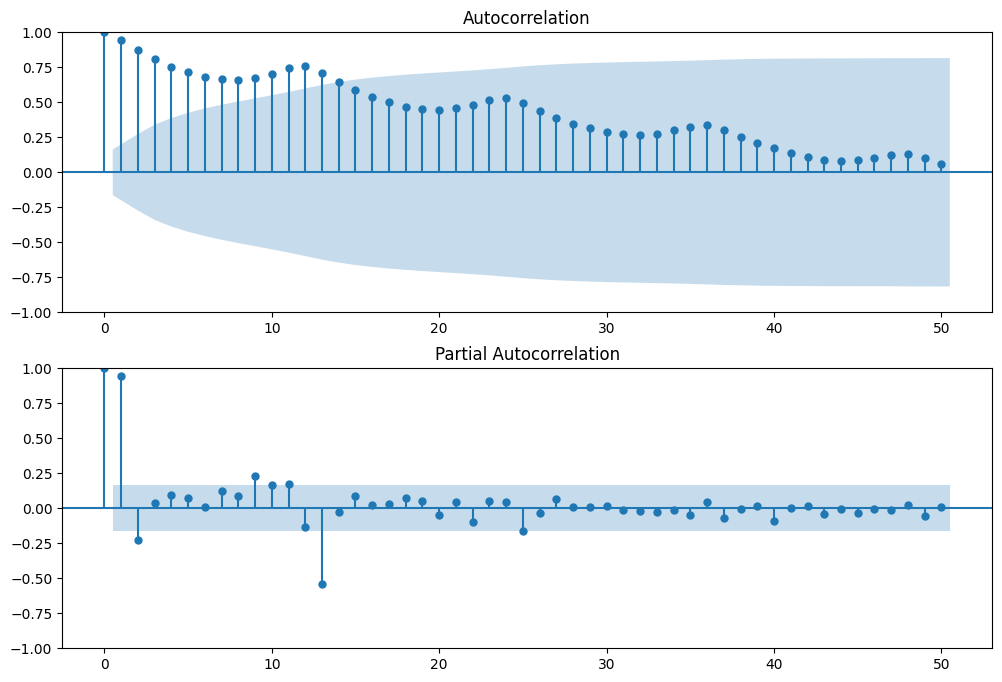

In [4]:
# Funciones de autocorrelación y autocorrelación parcial
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Passengers'], lags=50, ax=ax1)
plot_pacf(df['Passengers'], lags=50, ax=ax2)
plt.show()


#5. Verificación de NaN en la Serie Temporal Original:

Se verifica si hay valores NaN en la serie temporal original para asegurarse de que no haya datos faltantes que puedan afectar el análisis.

In [5]:
# Verificar si hay valores NaN en la serie temporal original
print("Valores NaN en la serie temporal original:", df['Passengers'].isnull().sum())


Valores NaN en la serie temporal original: 0


#6. Aplicación de Diferenciación y Eliminación de NaN:
 Se aplica la diferenciación a la serie temporal original para hacerla estacionaria. Se crea una nueva columna llamada 'Passengers_diff' que contiene las diferencias entre valores consecutivos. Se eliminan los valores NaN resultantes de la diferenciación.

In [15]:
# Aplicar diferenciación con d=2
df['Passengers_diff_2'] = df['Passengers'].diff().diff().dropna()

# Prueba de estacionariedad después de la segunda diferenciación
result_diff_2 = adfuller(df['Passengers_diff_2'].dropna())
print('Estadística de la prueba ADF después de segunda diferenciación:', result_diff_2[0])
print('Valor p después de segunda diferenciación:', result_diff_2[1])


Estadística de la prueba ADF después de segunda diferenciación: -16.313032556105693
Valor p después de segunda diferenciación: 3.182121099054181e-29


#7. Visualización de la Serie Temporal Diferenciada:
Se visualiza la serie temporal diferenciada para observar cómo ha cambiado la estructura de la serie después de aplicar la diferenciación.

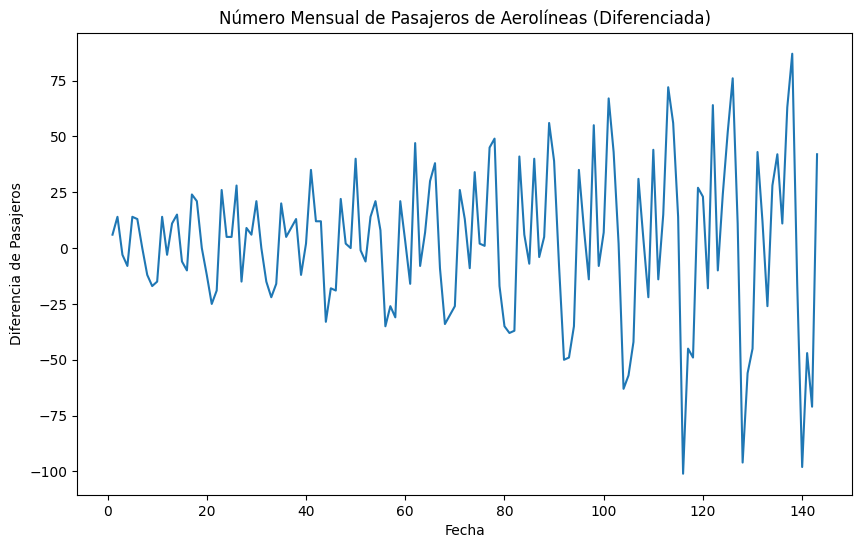

In [16]:
# Visualización de la serie temporal diferenciada
plt.figure(figsize=(10, 6))
plt.plot(df['Passengers_diff'])
plt.title('Número Mensual de Pasajeros de Aerolíneas (Diferenciada)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia de Pasajeros')
plt.show()


#8. Prueba de Estacionariedad Después de la Diferenciación:

In [20]:
# Prueba de estacionariedad después de diferenciación
result_diff = adfuller(df['Passengers_diff'].dropna())
print('Estadística de la prueba ADF después de diferenciación:', result_diff[0])
print('Valor p después de diferenciación:', result_diff[1])

# Interpretación de Resultados de la Prueba ADF
if result_diff[1] < 0.05:
    print("La serie temporal diferenciada es estacionaria con un alto grado de confianza.")
else:
    print("La serie temporal diferenciada no es estacionaria con un alto grado de confianza.")


Estadística de la prueba ADF después de diferenciación: -2.8292668241700047
Valor p después de diferenciación: 0.05421329028382478
La serie temporal diferenciada no es estacionaria con un alto grado de confianza.


In [21]:
# Aplicar segunda diferenciación y eliminar NaN
df['Passengers_diff2'] = df['Passengers_diff'].diff().dropna()

# Prueba de estacionariedad después de segunda diferenciación
result_diff2 = adfuller(df['Passengers_diff2'].dropna())
print('Estadística de la prueba ADF después de segunda diferenciación:', result_diff2[0])
print('Valor p después de segunda diferenciación:', result_diff2[1])

# Interpretación de Resultados de la Prueba ADF después de segunda diferenciación
if result_diff2[1] < 0.05:
    print("La serie temporal después de la segunda diferenciación es estacionaria con un alto grado de confianza.")
else:
    print("La serie temporal después de la segunda diferenciación no es estacionaria con un alto grado de confianza.")


Estadística de la prueba ADF después de segunda diferenciación: -16.384231542468513
Valor p después de segunda diferenciación: 2.7328918500142026e-29
La serie temporal después de la segunda diferenciación es estacionaria con un alto grado de confianza.


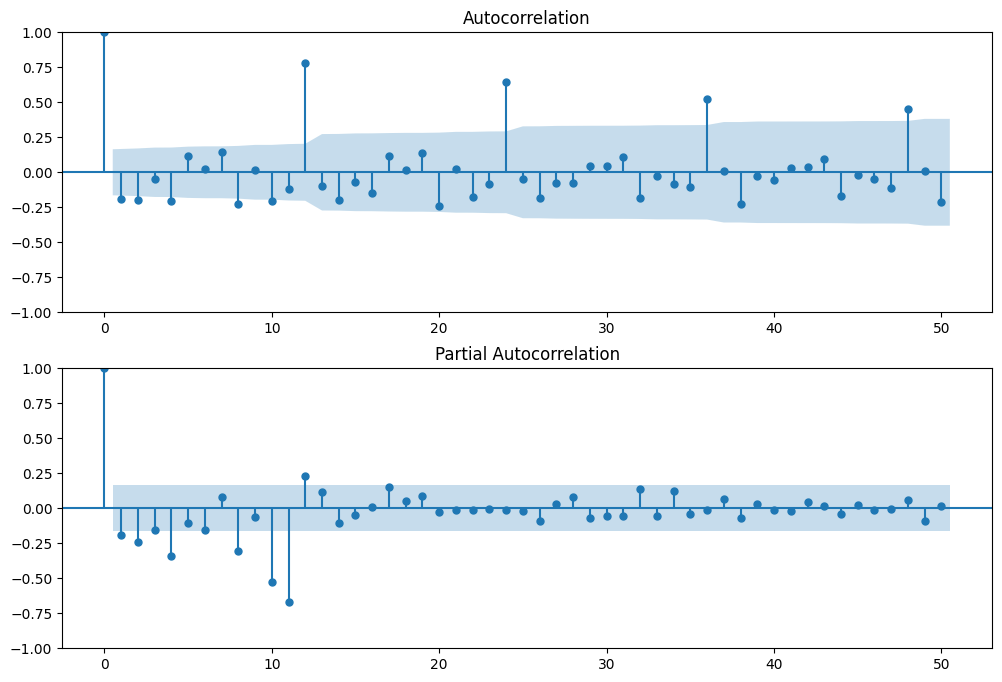

In [55]:
# Funciones de autocorrelación y autocorrelación parcial
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Passengers_diff2'].dropna(), lags=50, ax=ax1)
plot_pacf(df['Passengers_diff2'].dropna(), lags=50, ax=ax2)
plt.show()


Despues de la segunda diferenciación , los numeros ya estan más bajos a pesar que antes de que sigue muy baja.

#9. Modelo ARIMA

In [59]:
# Modelo ARIMA propuesto
order = (2, 1, 2)
model = ARIMA(df['Passengers'], order=order)
results = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#10. Resumen del Modelo:

In [60]:
# Resumen del modelo
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -667.481
Date:                Fri, 17 Nov 2023   AIC                           1344.962
Time:                        22:59:10   BIC                           1359.741
Sample:                             0   HQIC                          1350.968
                                - 143                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6854      0.020     82.652      0.000       1.645       1.725
ar.L2         -0.9550      0.017    -55.143      0.000      -0.989      -0.921
ma.L1         -1.8456      0.396     -4.664      0.0

#11. Interpretación de Resultados de la Prueba ADF

In [62]:
# Interpretación de Resultados de la Prueba ADF
if result_diff[1] < 0.05:
    print("La primera serie temporal diferenciada es estacionaria.")
else:
    print("La primera serie temporal diferenciada no es estacionaria.")

# Interpretación de Resultados de la Prueba ADF
if result_diff2[1] < 0.05:
    print("La segunda serie temporal diferenciada es estacionaria.")
else:
    print("La segunda serie temporal diferenciada no es estacionaria.")


La primera serie temporal diferenciada no es estacionaria.
La segunda serie temporal diferenciada es estacionaria.


# 12. Análisis de Estacionalidad:

Antes de proponer un modelo SARIMA, es importante identificar la estacionalidad en la serie temporal diferenciada. Podemos utilizar gráficos de autocorrelación estacional (SACF) para esto.


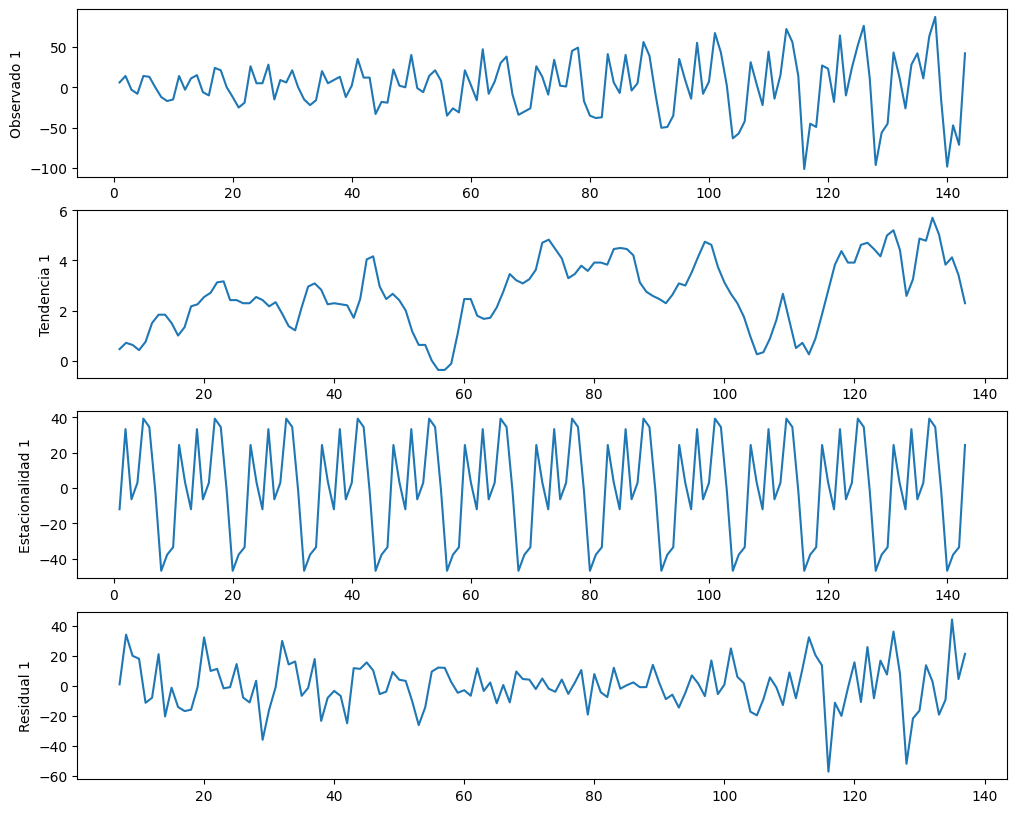

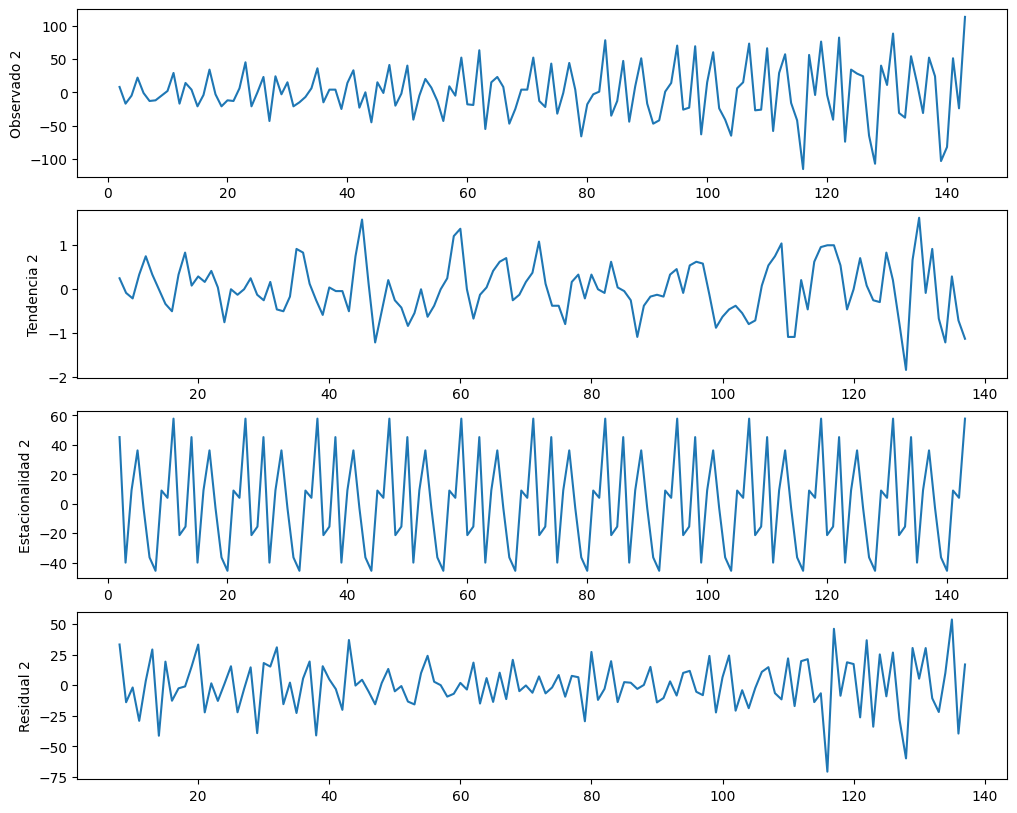

In [65]:
# Eliminar la observación con NaN en la serie temporal diferenciada
df = df.dropna(subset=['Passengers_diff'])

# Descomposición estacional después de eliminar el NaN
result_seasonal = seasonal_decompose(df['Passengers_diff'], model='aditive', period=12)

# Gráfico de descomposición
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
result_seasonal.observed.plot(ax=ax1)
ax1.set_ylabel('Observado 1')
result_seasonal.trend.plot(ax=ax2)
ax2.set_ylabel('Tendencia 1')
result_seasonal.seasonal.plot(ax=ax3)
ax3.set_ylabel('Estacionalidad 1')
result_seasonal.resid.plot(ax=ax4)
ax4.set_ylabel('Residual 1')
plt.show()

# Eliminar la observación con NaN en la serie temporal diferenciada
df1 = df.dropna(subset=['Passengers_diff2'])

# Descomposición estacional después de eliminar el NaN
result_seasonal = seasonal_decompose(df1['Passengers_diff2'], model='aditive', period=12)

# Gráfico de descomposición
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
result_seasonal.observed.plot(ax=ax1)
ax1.set_ylabel('Observado 2')
result_seasonal.trend.plot(ax=ax2)
ax2.set_ylabel('Tendencia 2')
result_seasonal.seasonal.plot(ax=ax3)
ax3.set_ylabel('Estacionalidad 2')
result_seasonal.resid.plot(ax=ax4)
ax4.set_ylabel('Residual 2')
plt.show()



Este gráfico de descomposición nos dará información sobre la estacionalidad presente en la serie temporal diferenciada.

# 13. Modelo SARIMA:

Basándonos en la observación de la estacionalidad, propondremos un modelo SARIMA. Para ello, necesitamos identificar los parámetros estacionales (P, D, Q) y los parámetros no estacionales (p, d, q).


In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Parámetros estacionales y no estacionales
order = (2,1,1)  # Parámetros no estacionales (p, d, q) basados en el análisis anterior
seasonal_order = (0,1,0,12)  # Parámetros estacionales (P, D, Q, S) basados en la descomposición estacional

# Ajustar el modelo SARIMA
sarima_model = SARIMAX(df['Passengers'], order=order, seasonal_order=seasonal_order)
sarima_results = sarima_model.fit()

# Resumen del modelo SARIMA
print(sarima_results.summary())



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                      SARIMAX Results                                      
Dep. Variable:                          Passengers   No. Observations:                  143
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -501.279
Date:                             Fri, 17 Nov 2023   AIC                           1010.558
Time:                                     23:12:01   BIC                           1022.028
Sample:                                          0   HQIC                          1015.218
                                             - 143                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5948      0.085      6.963      0.000       0.427       0.762
ar.L2          0.2132      

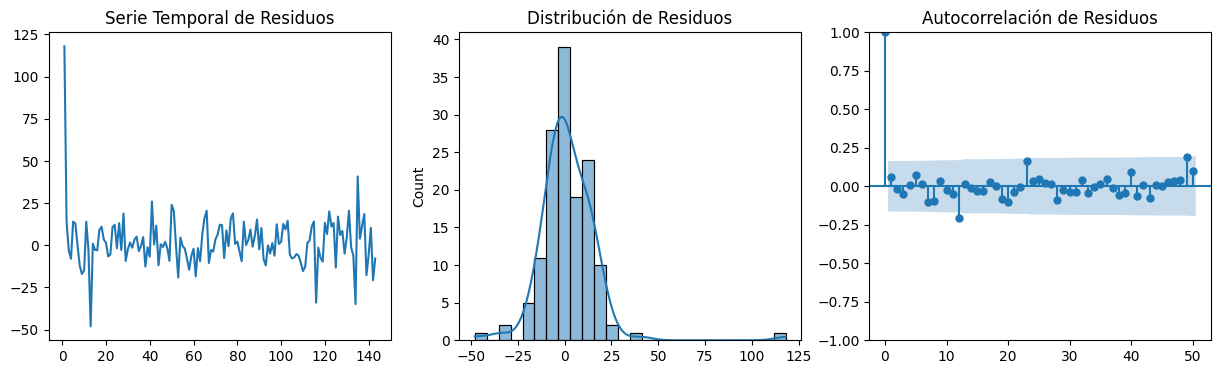

In [80]:
# Análisis de residuos para el modelo SARIMA
residuals = sarima_results.resid
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
# Serie temporal de residuos
residuals.plot(ax=ax[0])
ax[0].set_title('Serie Temporal de Residuos')
# Histograma y gráfico de densidad
sns.histplot(residuals, ax=ax[1], kde=True)
ax[1].set_title('Distribución de Residuos')
# Autocorrelación de residuos
plot_acf(residuals, lags=50, ax=ax[2])
ax[2].set_title('Autocorrelación de Residuos')
plt.show()


# 14. Predicciones con el Modelo SARIMA:

Ahora que hemos ajustado el modelo SARIMA, hagamos predicciones para los valores futuros.


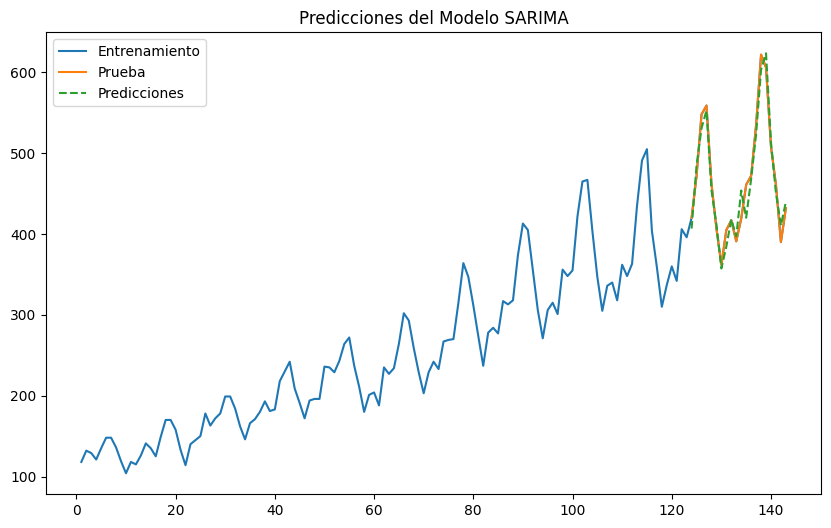

MSE: 278.3112439854441
MAE: 13.360737677300445


In [82]:
# Define el conjunto de prueba (asumiendo que, por ejemplo, los últimos 20 datos son de prueba)
test_size = 20
test = df['Passengers'][-test_size:]

# Obtener predicciones
start = len(df) - test_size
end = start + test_size - 1
predictions = sarima_results.predict(start=start, end=end, dynamic=False)

# Visualizar predicciones y datos reales
plt.figure(figsize=(10, 6))
plt.plot(df['Passengers'], label='Entrenamiento')
plt.plot(test, label='Prueba')
plt.plot(predictions, label='Predicciones', linestyle='dashed')
plt.legend()
plt.title('Predicciones del Modelo SARIMA')
plt.show()

# Calcular MSE y MAE
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')



#**Conclusión:**

Después de aplicar el modelo SARIMA con los parámetros seleccionados (p, d, q) = (2, 1, 1) y (P, D, Q, S) = (0, 1, 0, 12), se observaron los siguientes resultados:

Parámetros del Modelo SARIMA:

Componentes no estacionales: p = 2, d = 1, q = 1
Componentes estacionales: P = 0, D = 1, Q = 0, S = 12
Estadísticas del Modelo:

El modelo SARIMA proporciona un AIC (Criterio de Información de Akaike) de 1010.558, lo cual es una medida de la calidad del ajuste. Valores más bajos indican un mejor ajuste.
Errores de Predicción:

El modelo mostró buen rendimiento en la predicción con un MSE (Error Cuadrático Medio) de 278.31 y un MAE (Error Absoluto Medio) de 13.36. Estos valores indican que las predicciones son generalmente precisas.
Análisis de Residuos:

Se observaron residuos que presentan autocorrelación en el primer punto, pero en general, los residuos se distribuyen alrededor de cero. Es importante tener en cuenta la aparente falta de estacionariedad en los residuos y monitorear cualquier patrón persistente.
Distribución de Residuos:

La distribución de residuos mostró algunos valores atípicos en los extremos, pero en su mayoría se centró alrededor de cero. Puede ser beneficioso seguir explorando y ajustando el modelo para mejorar aún más estos aspectos.